In [3]:
!pip install yahoo-finance

In [4]:
!pip install yfinance
!pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=b9b3ef94034e80ca8e9b1dbd541f6965e992d09e0dd4304834f4a2249599f303
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\7d\59\6e\ff5fc25443eef95656f84b7a3a421fa2a9d6eaaae7a1b7c08f
Successfully built yahoofinancials


In [5]:
import yfinance as yf

In [6]:
import pandas as pd
from yahoofinancials import YahooFinancials

# Dowloading sp500 price data

In [7]:
sp500 = yf.Ticker("^GSPC")

In [8]:
sp500 = sp500.history(period ='max')

In [9]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3414470000,0,0
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3160350000,0,0
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3452150000,0,0


In [10]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
               '2022-07-15', '2022-07-18', '2022-07-19', '2022-07-20',
               '2022-07-21', '2022-07-22'],
              dtype='datetime64[ns]', name='Date', length=18257, freq=None)

# Cleaning and visulazing our stock market data

<AxesSubplot:xlabel='Date'>

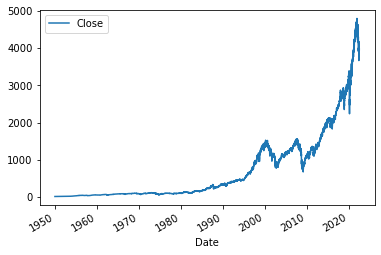

In [12]:
sp500.plot.line(y ='Close', use_index = True)

In [13]:
del sp500['Dividends']
del sp500['Stock Splits']

# setting up our target for machine learning

In [14]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3414470000,3936.689941
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3160350000,3959.899902
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3452150000,3998.949951


In [17]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [18]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3414470000,3936.689941,1
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3160350000,3959.899902,1
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3452150000,3998.949951,1


In [19]:
sp500 = sp500. loc['1990-01-01':].copy()

In [20]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3414470000,3936.689941,1
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3160350000,3959.899902,1
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3452150000,3998.949951,1


# training an intital machine learning model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [31]:
#from sklearn importing precission score to predict the target
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.46835443037974683

In [34]:
combined = pd.concat([test['Target'],preds], axis =1)

<AxesSubplot:xlabel='Date'>

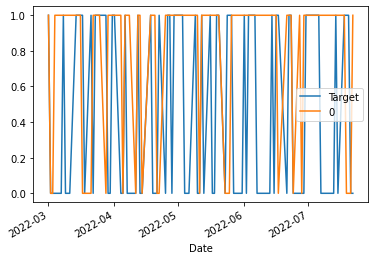

In [35]:
combined.plot()

# building a backtesting system

In [39]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'],preds], axis =1)
    return combined

In [42]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [43]:
predictions = backtest(sp500, model, predictors)

In [44]:
predictions["Predictions"].value_counts()

0    3331
1    2372
Name: Predictions, dtype: int64

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])

0.534991568296796

In [46]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.536384
0    0.463616
Name: Target, dtype: float64

# adding additional predictors to our model

In [47]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [56]:
#missing rows
sp500 = sp500.dropna()

In [49]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3537130000,3830.850098,0,1.009509,1.0,1.009789,1.0,0.968383,27.0,0.881902,127.0,1.104680,546.0
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3414470000,3936.689941,1,0.995801,1.0,1.002579,1.0,0.962812,27.0,0.874920,126.0,1.095130,546.0
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3160350000,3959.899902,1,1.013626,1.0,1.023961,2.0,0.991311,28.0,0.899439,126.0,1.125027,547.0


# improving our model

In [50]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [51]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [52]:
predictions = backtest(sp500, model, new_predictors)

In [53]:
predictions["Predictions"].value_counts()

0.0    3898
1.0     804
Name: Predictions, dtype: int64

In [54]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5708955223880597

In [55]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.547427
0    0.452573
Name: Target, dtype: float64